# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# URL for API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query URL

units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [21]:
# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

In [22]:
# Loop through cities
for city in cities:

# Response for API Call

    response_json = requests.get(query_url + city).json()
    
# Start the error handling
# Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
# Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: guerrero negro, City ID: 4021858
City Name: tuatapere, City ID: 2180815
City Name: henties bay, City ID: 3356832
City Name: ixtapa, City ID: 4004293
City Name: severo-kurilsk, City ID: 2121385
City Name: mount gambier, City ID: 2156643
City Name: saint-philippe, City ID: 935215
City Name: carnarvon, City ID: 2074865
That record does not exist, searching for next record...
City Name: astana, City ID: 1526273
City Name: tuktoyaktuk, City ID: 6170031
City Name: dingle, City ID: 1714733
City Name: oranjemund, City ID: 3354071
City Name: ilulissat, City ID: 3423146
City Name: pisco, City ID: 3932145
City Name: bredasdorp, City ID: 1015776
City Name: saint george, City ID: 5546220
City Name: chumikan, City ID: 2025256
City Name: shitanjing, City ID: 1794971
City Name: tulun, City ID: 2014927
City Name: vilcun, City ID: 3868210
City Name: seymchan, City ID: 2121373
City Name: los llanos de aridane, City ID: 2514651
City Name: kapaa, City ID: 5848280
City Name: kruisfontein, City ID

City Name: shangqiu, City ID: 1783934
City Name: lagoa, City ID: 3372964
City Name: laela, City ID: 156098
City Name: bambanglipuro, City ID: 1650434
City Name: flin flon, City ID: 5954718
City Name: mahibadhoo, City ID: 1337605
City Name: kieta, City ID: 2094027
City Name: matagami, City ID: 6067747
That record does not exist, searching for next record...
City Name: half moon bay, City ID: 5354943
City Name: athabasca, City ID: 5887916
City Name: puerto ayora, City ID: 3652764
City Name: lapeer, City ID: 4998842
City Name: chibombo, City ID: 920233
City Name: verkhovazhye, City ID: 474354
City Name: lockhart, City ID: 4162539
City Name: macapa, City ID: 3396016
City Name: pangnirtung, City ID: 6096551
City Name: danville, City ID: 4755280
City Name: vao, City ID: 2137773
City Name: abu samrah, City ID: 172515
City Name: borkenes, City ID: 3160630
City Name: arman, City ID: 2127060
City Name: seminole, City ID: 4172445
City Name: csongrad, City ID: 721592
City Name: valkeala, City ID: 

City Name: tura, City ID: 1254046
That record does not exist, searching for next record...
City Name: bubaque, City ID: 2374583
City Name: puerto narino, City ID: 3671387
City Name: florianopolis, City ID: 6323121
City Name: iwanai, City ID: 2129868
City Name: plouzane, City ID: 2986626
That record does not exist, searching for next record...
City Name: asilah, City ID: 2557055
City Name: xacmaz, City ID: 584717
City Name: manokwari, City ID: 1636308
City Name: kirovskiy, City ID: 2022064
City Name: carora, City ID: 3646487
City Name: yining, City ID: 1786538
City Name: nagorsk, City ID: 523583
City Name: burns lake, City ID: 5911745
City Name: tulsipur, City ID: 1282635
That record does not exist, searching for next record...
City Name: bermeo, City ID: 3128174
City Name: quelimane, City ID: 1028434
City Name: snasa, City ID: 3138076
City Name: vanavara, City ID: 2013727
City Name: paragominas, City ID: 3393106
City Name: bansgaon, City ID: 1277235
City Name: dunedin, City ID: 2191562

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Dataframe

cities_data_df = pd.DataFrame({"City ID": city_id_list, "City Name": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_data_df.head()

,City ID,City Name,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4021858,Guerrero Negro,MX,27.9769,-114.0611,75.63,56,8,12.75
1,2180815,Tuatapere,NZ,-46.1333,167.6833,39.81,66,13,6.96
2,3356832,Henties Bay,NA,-22.1160,14.2845,54.86,92,0,8.99
3,4004293,Ixtapa,MX,20.7000,-105.2000,83.43,74,75,9.22
4,2121385,Severo-Kuril'sk,RU,50.6789,156.1250,53.82,93,66,5.03


In [24]:
# Export to .csv file
#cities_data_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
sorted_humidity_df = cities_data_df.sort_values("Humidity", ascending = "False")
sorted_humidity_df

,City ID,City Name,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
415,2450173,Taoudenni,ML,22.6783,-3.9836,107.56,8,53,9.42
263,2460954,Araouane,ML,18.9048,-3.5265,105.17,8,0,7.43
291,1133310,Mīrābād,AF,30.4362,61.8383,89.42,9,0,9.51
330,2455290,Kidal,ML,18.4411,1.4078,99.75,9,0,9.13
531,1160939,Iranshahr,IR,27.2025,60.6848,92.16,9,5,5.48
...,...,...,...,...,...,...,...,...,...
435,1627877,Sembakung,ID,3.8167,117.2500,73.24,99,87,1.21
456,1261173,North Vanlaiphai,IN,23.1333,93.0667,62.80,99,79,1.39
447,1737185,Kapit,MY,2.0167,112.9333,73.44,100,100,0.69
113,2065594,Mount Isa,AU,-20.7333,139.5000,56.97,100,8,0.00


In [26]:
#  Get the indices of cities that have humidity over 100%.

# No cities with Humidity greater than 100%

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [28]:

# No Cities with Humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

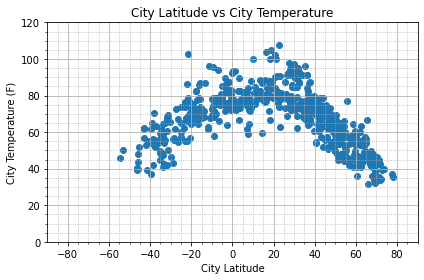

In [29]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Temperature"]


plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")
plt.title("City Latitude vs City Temperature")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0,120)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

plt.savefig("../Images/Latitude vs Max Temp.png")


## Latitude vs. Humidity Plot

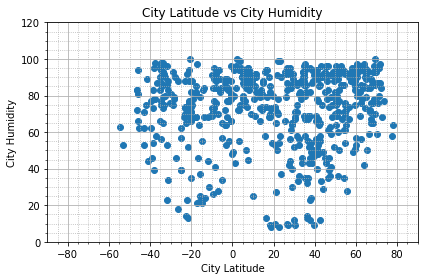

In [30]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Humidity"]


plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs City Humidity")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0,120)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show


plt.savefig("../Images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

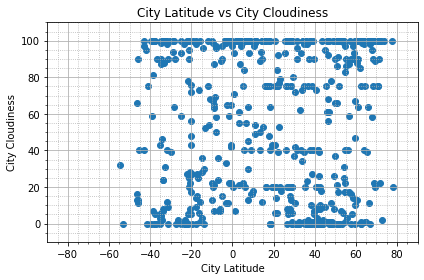

In [31]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Clouds"]

plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness")
plt.title("City Latitude vs City Cloudiness")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(-10,110)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

plt.savefig("../Images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

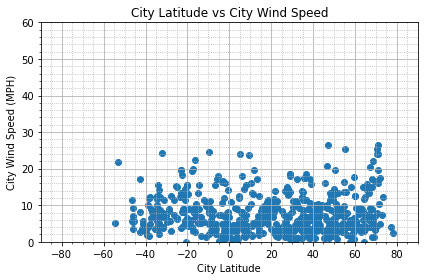

In [32]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Wind Speed"]

plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed (MPH)")
plt.title("City Latitude vs City Wind Speed")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0, 60)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

plt.savefig("../Images/Latitude vs Wind Speed.png")

## Linear Regression

In [33]:
northern_lat = cities_data_df.loc[cities_data_df["Lat"]>= 0]
southern_lat = cities_data_df.loc[cities_data_df["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

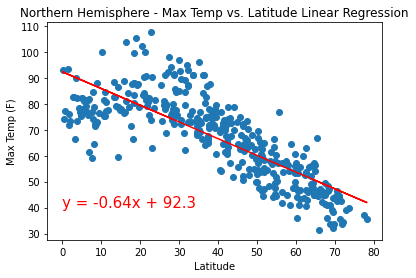

In [34]:
x_values = northern_lat['Lat']
y_values = northern_lat['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)


# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

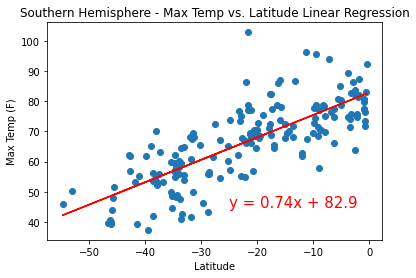

In [35]:
x_values = southern_lat['Lat']
y_values = southern_lat['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

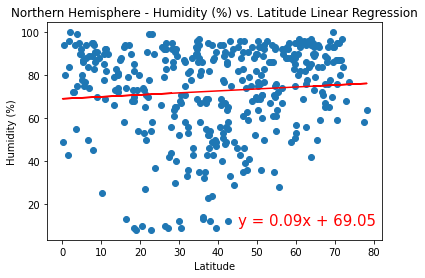

In [36]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

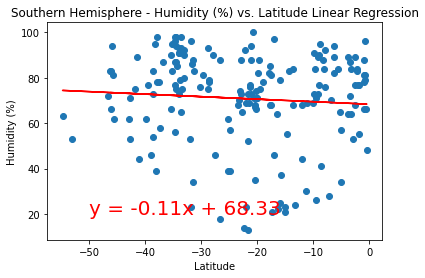

In [37]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

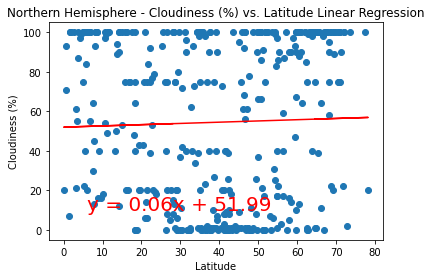

In [38]:
x_values = northern_lat['Lat']
y_values = northern_lat['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

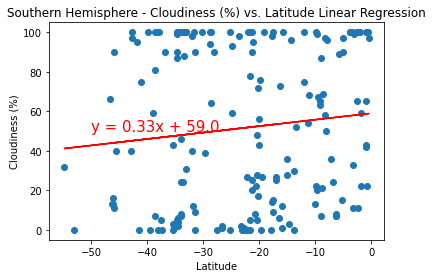

In [39]:
x_values = southern_lat['Lat']
y_values = southern_lat['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

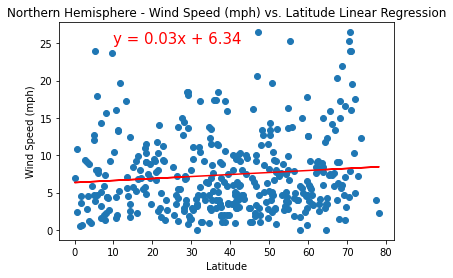

In [40]:
x_values = northern_lat['Lat']
y_values = northern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

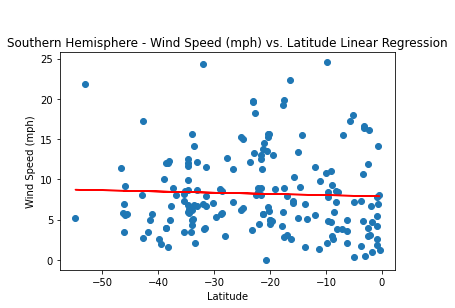

In [41]:
x_values = southern_lat['Lat']
y_values = southern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
